In [1]:
#import the important libaries
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from agent_navigation import Agent
import time
import random

In [2]:
#definition hyperparameters and trainingsconditions
max_episodes = 500
max_timestaps = 1000
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995
training_mode = True
gamma = 0.99

#environment parameters
state_size = 37
action_size = 4
seed = 0

In [3]:
#define the environment
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

#get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

#get number of possible actions
action_size = brain.vector_action_space_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 5	Average Score: 0.400

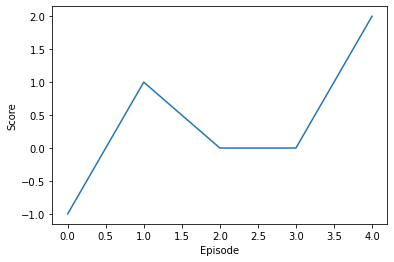

In [4]:
#define an agent
agent = Agent(state_size, action_size, seed)

#counter to print envirement sloved only once
counter = 0

#train the agent
def dqn_train(n_episodes, max_t, eps_start, eps_end, eps_decay):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    #list containing scores from each episode
    scores = []
    #last 100 scores
    scores_window = deque(maxlen=100)
    #initialize epsilon
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        global counter
        #reset the environment
        env_info = env.reset(train_mode=training_mode)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            #select an action
            action = agent.act(state)
            #send the action to the environment
            env_info = env.step(action)[brain_name]  
            #get the next state
            next_state = env_info.vector_observations[0]
            # get the reward
            reward = env_info.rewards[0]
            #see if episode has finished
            done = env_info.local_done[0]
            #save step in memory and learn from this step
            agent.step(state, action, reward, next_state, done)
            #update the score
            score += reward
            #roll over the state to next time step
            state = next_state
            # exit loop if episode finished
            if done:
                break
        #save most recent score
        scores_window.append(score)
        #save most recent score
        scores.append(score)
        #decrease epsilon
        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13 and counter == 0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            counter = 1
    return scores
            
#torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
scores = dqn_train(max_episodes, max_timestaps, max_epsilon, min_epsilon, epsilon_decay)

#plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()

In [5]:
#close the environment
env.close()